In [136]:
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep

In [91]:
%matplotlib notebook

In [430]:
#生データ
df = pd.read_csv('WAC.csv')
df.replace({np.nan: None},inplace=True)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 26 columns):
Competitor        109 non-null object
Year              109 non-null int64
Origin            109 non-null object
Region            29 non-null object
Coffee            108 non-null object
Position          109 non-null object
Filter            109 non-null object
Preperation       70 non-null object
Coffee Weight     109 non-null object
Grinder           109 non-null object
Grind             109 non-null int64
Water Weight      109 non-null object
Type              109 non-null object
Temp              109 non-null int64
1st Add           109 non-null int64
1st Time          109 non-null object
1st Swirl/Stir    82 non-null object
2nd Add           70 non-null object
2nd Time          70 non-null object
2nd Swirl/Stir    31 non-null object
3rd Add           7 non-null object
3rd Time          7 non-null object
3rd Swirl/Stir    1 non-null object
Press Time        109 non-null object

In [272]:
df.describe()

,Year,Coffee Weight,Grind,Water Weight,Temp,1st Add,1st Swirl/Stir,2nd Add,2nd Swirl/Stir,3rd Swirl/Stir,...,Indonesia,Kenya,Mexico,Nicaragua,Panama,Rwanda,Thailand,Venezuela,Metal,Paper
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,83.000000,70.000000,31.0,1.0,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2016.541284,23.397248,5.825688,228.059633,85.798165,95.963303,0.987952,146.471429,1.0,1.0,...,0.018349,0.183486,0.018349,0.009174,0.055046,0.045872,0.009174,0.018349,0.119266,1.275229
std,0.500594,6.153717,2.312783,36.243117,6.010454,63.541752,0.109764,50.648468,0.0,NaN,...,0.134829,0.388852,0.134829,0.095783,0.229123,0.210173,0.095783,0.134829,0.352892,0.591163
min,2016.000000,15.000000,0.000000,100.000000,65.000000,15.000000,0.000000,0.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,18.500000,4.000000,220.000000,82.000000,50.000000,1.000000,110.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017.000000,21.000000,6.000000,230.000000,85.000000,70.000000,1.000000,150.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2017.000000,30.000000,8.000000,245.000000,90.000000,120.000000,1.000000,190.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2017.000000,40.000000,10.000000,400.000000,98.000000,260.000000,1.000000,225.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


In [381]:
print(df.shape)

(109, 49)


In [361]:
#スタージェスの公式で階級数を求める
sturges = lambda n: math.ceil(1 + math.log2(n))

sturges(len(df['Year']))

8

### 特徴量の作成
- parameter
    - Country
    - Grind
    - Paper
    - Time
    - Water

### Grind Size編
挽かれたあるコーヒー豆は，あるグラインダーの種類とある挽き目の下で何らかの粒度分布に従う．
<img src="Distribution.png" />
[socratic coffee](https://www.instagram.com/p/BAqYcWQSuAo/)

データセットでは，その年の粒度の期待値(と想定)を相対的に0-10 or 1-9の間隔尺度で表現している．
#### 間隔尺度のイシュー
年度間で間隔の表すところが異なるのではないか．

◎ある年における数字の間隔は保持したい→○正規化 ×標準化
#### Min-Max Normalization
最小値０，最大値１に正規化
$$x' = \frac{x-min(x)}{max(x)-min(x)}$$
#### 方針
分布の形状などを中心に見たい．

In [523]:
#Grind sizeの相対化

#各年でクエリ
a = df.query('Year == "2017" ')
b = df.query('Year == "2016" ')
#Grindをarrayにして正規化し，クエリデータのgrind列に代入
a['grind'] = prep.minmax_scale(a['Grind'].values)
b['grind'] = prep.minmax_scale(b['Grind'].values)
#クエリデータを結合
df = pd.concat([a,b])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


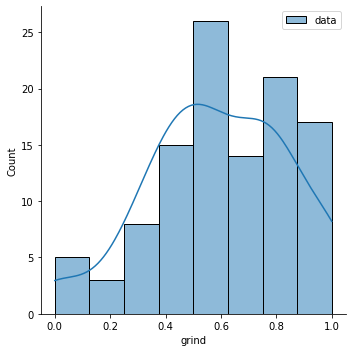

In [524]:
%matplotlib inline
sns.displot(
    df['grind'], bins=8, label='data',
    kde=True,
    rug=False
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

In [525]:
#記述統計
print(df['grind'].describe())
#歪度
print("skewness :", scipy.stats.skew(df['grind'].values.tolist()))
#尖度
print("kurtosis :", scipy.stats.kurtosis(df['grind'].values.tolist()))

count    109.000000
mean       0.589908
std        0.255407
min        0.000000
25%        0.400000
50%        0.600000
75%        0.800000
max        1.000000
Name: grind, dtype: float64
skewness : -0.29902951069165057
kurtosis : -0.38452364680430273


#### 考察
歪度からも分かるように分布は左に伸びている．

Grindの値が大きい(=相対的に粒度が粗い)ということは，コーヒーの成分をあまり出さないよう意図しており，相対的に酸が出やすい．

### Country編
各国予選での決勝戦で競技用コーヒーに指定されたものの産地国を表す．単一国により構成されるものもあれば，ブレンドされたものもある．
#### カテゴリ変数のイシュー
カテゴリ変数のため，ダミー変数化が必要．One-hot encordingとも呼ばれる．

本ケースでは「ブレンド」されたものが存在しており，これが課題（Cup of Excellenceにおいてミックスされた品種も同じ問題）．そのままダミー化関数を利用すると，ブレンドも単一国も同じようにコンピューターは理解してしまう．

◎ブレンドは二つの国を表すクラスに属するように表したい→ダミー化+ブレンド要素以外の列を削除

#### 方針
各年の産地国推移などを見る

In [526]:
from IPython.display import display

s1 = ['Ethiopia', 'Colombia', 'Kenya']
sample_1 = pd.DataFrame(s1,
                      index=['a','b','c'],
                      columns=['Country'])
display(sample)
print('原産国が3つのケース')

d1 = [[1,0,0],[0,1,0],[0,0,1]]
sample1 = pd.DataFrame(d1,
                      index=['a','b','c'],
                      columns=['Ethiopia', 'Colombia', 'Kenya'])
display(sample1)
print('そのままone-hot')

d1_blend = [[1,0,0],[0,1,0],[0,0,1]]
sample1_blend = pd.DataFrame(d1_blend,
                      index=['a','b','c'],
                      columns=['Ethiopia', 'Colombia', 'Ethiopia & Colombia'])
display(sample1_blend)
print('KenyaであろうがEthiopia & Colombiaだろうが同じ表現になってしまう')

d1_right = [[1,0],[0,1],[0,0]]
sample1_right = pd.DataFrame(d1_right,
                      index=['a','b','c'],
                      columns=['Ethiopia', 'Colombia'])
display(sample1_right)
print('kenyaは(0,0)で示せる')

s2 = ['Ethiopia', 'Colombia', 'Ethiopia & Colombia', 'Kenya']
sample_2 = pd.DataFrame(s2,
                      index=['a','b','c','d'],
                      columns=['Country'])
display(sample_2)
print('ブレンドが含まれてたら？')



d2 = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
sample2 = pd.DataFrame(d2,
                      index=['a','b','c','d'],
                      columns=['Ethiopia', 'Colombia', 'Ethiopia & Colombia', 'Kenya'])
display(sample2)
print('one-hot')

d3 = [[1,0,0],[0,1,0],[1,1,0],[0,0,1]]
sample3 = pd.DataFrame(d3,
                      index=['a','b','c','d'],
                      columns=['Ethiopia', 'Colombia','Kenya'])
display(sample3)
print('Ethiopia & ColombiaはEthiopia, Colombiaそれぞれに1振りたい')

d4 = [[1,0],[0,1],[1,1],[0,0]]
sample4 = pd.DataFrame(d4,
                      index=['a','b','c','d'],
                      columns=['Ethiopia', 'Colombia'])
display(sample4)
print('kenyaは(0,0)で示せるからkenya列は消せる')

d5 = [[1,0],[0,1],[1,0],[0,0]]
sample5 = pd.DataFrame(d5,
                      index=['a','b','c','d'],
                      columns=['Ethiopia', 'Kenya'])
display(sample5)
print('kenya以外の列を消去すると...')



,Country
a,Ethiopia
b,Colombia
c,Kenya


原産国が3つのケース


,Ethiopia,Colombia,Kenya
a,1,0,0
b,0,1,0
c,0,0,1


そのままone-hot


,Ethiopia,Colombia,Ethiopia & Colombia
a,1,0,0
b,0,1,0
c,0,0,1


KenyaであろうがEthiopia & Colombiaだろうが同じ表現になってしまう


,Ethiopia,Colombia
a,1,0
b,0,1
c,0,0


kenyaは(0,0)で示せる


,Country
a,Ethiopia
b,Colombia
c,Ethiopia & Colombia
d,Kenya


ブレンドが含まれてたら？


,Ethiopia,Colombia,Ethiopia & Colombia,Kenya
a,1,0,0,0
b,0,1,0,0
c,0,0,1,0
d,0,0,0,1


one-hot


,Ethiopia,Colombia,Kenya
a,1,0,0
b,0,1,0
c,1,1,0
d,0,0,1


Ethiopia & ColombiaはEthiopia, Colombiaそれぞれに1振りたい


,Ethiopia,Colombia
a,1,0
b,0,1
c,1,1
d,0,0


kenyaは(0,0)で示せるからkenya列は消せる


,Ethiopia,Kenya
a,1,0
b,0,1
c,1,0
d,0,0


kenya以外の列を消去すると...


In [527]:
#産地のダミー化
country = pd.get_dummies(df['Origin'])
#ブレンドをそれぞれに割り振り
country.loc[country['Colombia & Brazil'] == 1, ['Colombia', 'Brazil']] = [1,1]
country.loc[country['Colombia & Rwanda'] == 1, ['Colombia', 'Rwanda']] = [1,1]
country.loc[country['Ethiopia & Costa Rica'] == 1, ['Colombia', 'Costa Rica']] = [1,1]
country.loc[country['Colombia & Honduras'] == 1, ['Colombia', 'Honduras']] = [1,1]
#ブレンド列を削除
country = country.drop(['Colombia & Brazil', 'Colombia & Rwanda', 'Ethiopia & Costa Rica', 'Colombia & Honduras'], axis=1)
#マルチコの回避

#データセットにjoin
df =  df.join(country, how="left")
df

,Competitor,Year,Origin,Region,Coffee,Position,Filter,Preperation,Coffee Weight,Grinder,Grind,Water Weight,Type,Temp,1st Add,1st Time,1st Swirl/Stir,2nd Add,2nd Time,2nd Swirl/Stir,3rd Add,3rd Time,3rd Swirl/Stir,Press Time,Dilution,TT,Total Time,grind,Bolivia,Brazil,Burundi,Colombia,Costa Rica,Eastern Congo,Ecuador,El Salvador,Ethiopia,Guatemala,Honduras,India,Indonesia,Kenya,Mexico,Nicaragua,Panama,Rwanda,Thailand,Venezuela
0,AUSTRALIAN,2017,Kenya,None,Muwa Estate,Inverted,Paper,Rinsed,20,Porlex Hand Grinder & Lido 2,4,220,Bottled water (Woolworths Select),85,170,60.0,1,None,None,None,None,None,None,60,50,None,120,0.400,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,AUSTRIAN,2017,Kenya,None,Kiamabara,Inverted,Paper,Rinsed,30,Comandante,5,240,Filtered water,85,120,30.0,1,None,None,None,None,None,None,30,?,None,60,0.500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,BELARUS,2017,Indonesia,None,Mr.Siregar,Uplight,Paper,Rinsed,17,Bork J701,4,210,Bottled water(BonAqua),92,70,51.0,None,70,54.7937,1,70,10,None,20,None,None,135,0.400,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,BELGIAN,2017,Ethiopia,None,Chelelektu,Inverted,Double Paper & Metal,Able Disk Filter,30,Tanzania,8,230,Filtered water,90,120,50.0,1,None,None,None,None,None,None,20,110,None,70,0.800,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,BRAZILIAN,2017,Brazil,None,Sitio Santa Rita,Uplight,Paper,Rinsed,30,EK43,8,270,Tap Water,83,110,15.0,1,110,20,1,None,None,None,40,50,None,75,0.800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,CANADIAN,2017,Kenya,None,Gakuyu-ini AA,Inverted,Paper,Rinsed,34,EK43,8,160,Filtered water,86,150,60.0,1,None,None,None,None,None,None,30,→200,None,90,0.800,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,CHINA,2017,Kenya,None,Thunguri Manor,Uplight,Paper,None,30,WPM ZD-10,0,260,Bottled water (Nongfu Spring),83,150,90.0,1,None,None,None,None,None,None,40,110,None,130,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,COLOMBIAN,2017,Colombia,None,Caicedo,Inverted,Paper,Rinsed,30,Comandante,5,280,Bottled water (Nacimiento),90,160,110.0,1,0,40,None,None,None,None,15,120,None,165,0.500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,CZECH,2017,El Salvador,None,El Aguacatal,Uplight,Double Paper,None,18,EK43,5,240,Filtered water,88,40,30.0,1,100,54.7937,1,None,None,None,30,90,None,114,0.500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,DANISH,2017,Bolivia,None,Finca Don Carlos,Uplight,Paper,Rinsed,20,EK43,8,230,Filtered water,80,50,30.0,1,180,30,None,None,None,None,30,None,None,90,0.800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


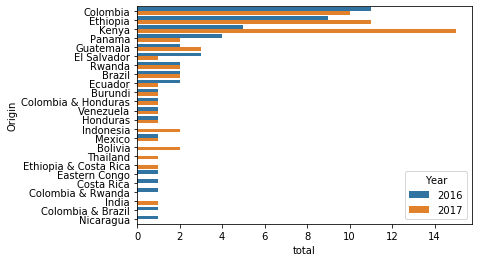

In [528]:
%matplotlib inline

#競技用豆のEDA

#産地国と年度の組み合わせごとにグループ化
by_Origin_Year = df.groupby(['Origin', 'Year'])

#sizeを用いて国の出現回数を集計. unstackで結果をテーブル形式化
agg_counts = by_Origin_Year.size().unstack().fillna(0)

#昇順のソートを使用する
indexer = agg_counts.sum(1).argsort()[::-1]
count_subset = agg_counts.take(indexer)

#グラフ描画のため並び替え
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

sns.barplot(x='total', y='Origin', hue='Year', data=count_subset)

In [529]:
sns.barplot(x=country.values, y=country.index)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

### 考察
2016から2017にかけて、kenyaの数が増えた

# Filter編
ドリップに用いるフィルターに関する情報．Paper FilterまたはMetal Filterをそれぞれ何枚使ったかがデータであり，比例尺度となる．
#### 比例尺度のイシュー
◎Paper・Metalそれぞれ列を作り，枚数をデータとする．
#### 方針
分布チェック

In [530]:
#ダミー化
Filter = pd.get_dummies(df['Filter'])

#データ代入
Filter.loc[Filter['Double Paper & Metal'] == 1, ['Paper', 'Metal']] = [2,1]
Filter.loc[Filter['Double Paper'] == 1, 'Paper'] = 2
Filter.loc[Filter['Paper & Metal'] == 1, ['Paper', 'Metal']] = [1,1]
Filter.loc[Filter['Triple Paper'] == 1, 'Paper'] = 3
Filter.loc[Filter['Double Paper & Double Metal'] == 1, ['Paper', 'Metal']] = [2,2]
Filter.loc[Filter['Other'] == 1, 'Paper'] = 1

#Other列は削除
Filter = Filter.drop(['Double Paper & Metal'], axis=1)
Filter = Filter.drop(['Double Paper'], axis=1)
Filter = Filter.drop(['Paper & Metal'], axis=1)
Filter = Filter.drop(['Triple Paper'], axis=1)
Filter = Filter.drop(['Double Paper & Double Metal'], axis=1)
Filter = Filter.drop(['Other'], axis=1)

#データセットにjoin
df =  df.join(Filter, how="left")


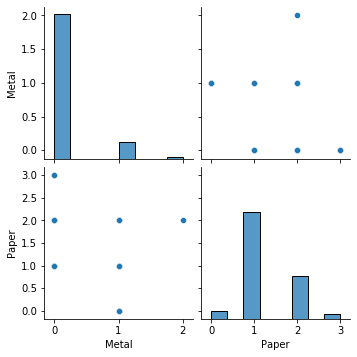

In [531]:
sns.pairplot(Filter)

### 考察
Paperが主体．トータル枚数のレンジは1-4枚．

# Water編
Aeropressのドリップでは，1.抽出用の水(1st, 2nd, 3rd) と 2.薄める用の水(Dillution)が存在する．

①1 ②1+2 ③1(+2)のどれかのケースにあてはまる，Water Usageのデータは存在する．それとは別に，1st+2nd+3rd+Dillutionの足し合わせでWater Usageを求めることもできる．
#### Water欠損値のイシュー
抽出用の水(1st, 2nd, 3rd)のどれかが「?」として欠損値扱いされている．

Dillutionでは，「Up to ○○g」のように確定的な値でないが存在している．挽いたコーヒー豆にはその重さの約2倍の水が吸われるため，「○○g - (1st+2nd+3rd+2×Coffee) = Dillution」として計算もできる

◎?(=nan)は平均値or中央値で埋める.NullはNullのまま

◎計算により埋めてみる

#### 方針
分布チェック

In [ ]:
#Total TimeとWater usageの集約


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


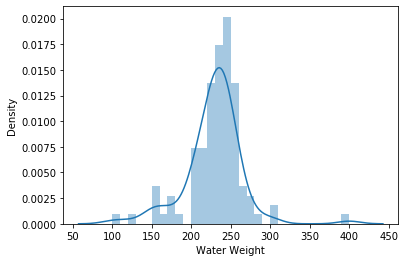

In [250]:
sns.distplot(df['Water Weight'], bins=30)

# Time編
Aeropressのドリップでは，1.水を投下してからの時間(1st, 2nd, 3rd) と 2.どの程度圧力を加えてプレスするかの時間(Press)が存在する．

明示的にTotal Timeはデータ化されていないので，1st+2nd+3rd+Pressの足し合わせでTotal Timeを求めることもできる．
#### Time欠損値のイシュー
Water編と同様

◎?は平均値or中央値で埋める

◎計算により埋めてみる

#### 方針
分布チェック

51.0
45.0
count    109.000000
mean      51.000000
std       30.310125
min        0.000000
25%       30.000000
50%       45.000000
75%       60.000000
max      180.000000
Name: 1st Time, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


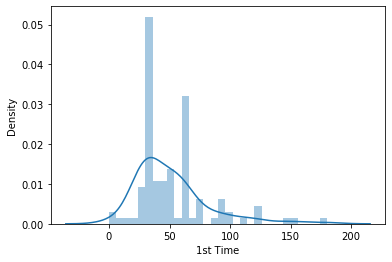

In [473]:
#1st Time

#コピーから代表値を作る
a = df['1st Time'].replace('?', np.nan).astype(float)
mean_1st_time = np.nanmean(a)
median_1st_time = np.nanmedian(a)
print(mean_1st_time)
print(median_1st_time)
print(a.describe())

#欠損値処理
for x in df['1st Time']:
    #?なら平均値埋め
    if x == '?':
        df.loc[df['1st Time'] == x, ['1st Time']] = mean_1st_time
    #str→float
    elif type(x) == str:
        df.loc[df['1st Time'] == x, ['1st Time']] = float(x)
    #Noneはそのまま
    else:
        df.loc[df['1st Time'] == x, ['1st Time']] = x
        
#nan埋めする前のプロット
sns.distplot(a, bins=30)

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


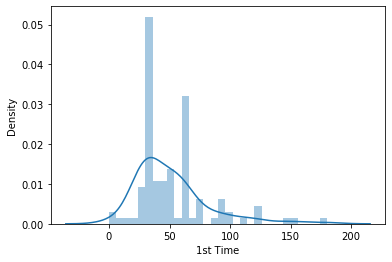

In [474]:
#nan埋め後のプロット
sns.distplot(df['1st Time'], bins=30)

54.7936507936508
54.79365079365079
count     70.000000
mean      54.793651
std       36.193585
min        0.000000
25%       30.000000
50%       54.793651
75%       60.000000
max      180.000000
Name: 2nd Time, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


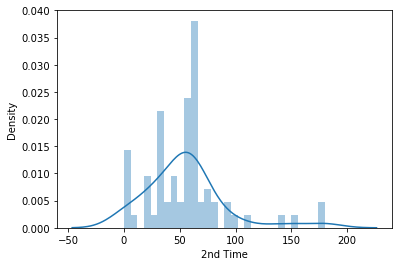

In [475]:
#2nd time

#コピーから代表値を作る
#一括floatによりNoneもNaNになってしまうため，コピーして代表値
b = df['2nd Time'].replace('?', np.nan).astype(float)
mean_2nd_time = np.nanmean(b)
median_2nd_time = np.nanmedian(b)
print(mean_2nd_time)
print(median_2nd_time)
print(b.describe())

#欠損値処理
for x in df['2nd Time']:
    #?なら平均値埋め
    if x == '?':
        df.loc[df['2nd Time'] == x, ['2nd Time']] = mean_2nd_time
    #str→float
    elif type(x) == str:
        df.loc[df['2nd Time'] == x, ['2nd Time']] = float(x)
    #Noneはそのまま
    else:
        df.loc[df['2nd Time'] == x, ['2nd Time']] = x
#nan埋めする前のプロット
sns.distplot(b, bins=30)

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


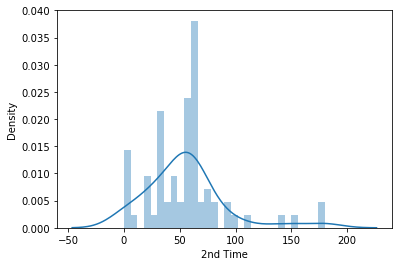

In [476]:
#nan埋め後のプロット
sns.distplot(df['2nd Time'], bins=30)

65.83333333333333
65.83333333333333
count      7.000000
mean      65.833333
std       37.239838
min       10.000000
25%       45.000000
50%       65.833333
75%       87.500000
max      120.000000
Name: 3rd Time, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


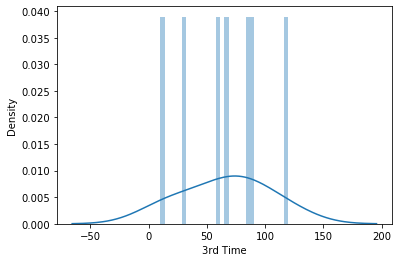

In [477]:
#3rd time

#コピーから代表値を作る
#一括floatによりNoneもNaNになってしまうため，コピーして代表値
c = df['3rd Time'].replace('?', np.nan).astype(float)
mean_3rd_time = np.nanmean(c)
median_3rd_time = np.nanmedian(c)
print(mean_3rd_time)
print(median_3rd_time)
print(c.describe())

#欠損値処理
for x in df['3rd Time']:
    #?なら平均値埋め
    if x == '?':
        df.loc[df['3rd Time'] == x, ['3rd Time']] = mean_3rd_time
    #str→float
    elif type(x) == str:
        df.loc[df['3rd Time'] == x, ['3rd Time']] = float(x)
    #Noneはそのまま
    else:
        df.loc[df['3rd Time'] == x, ['3rd Time']] = x
#nan埋めする前のプロット
sns.distplot(c, bins=30)

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


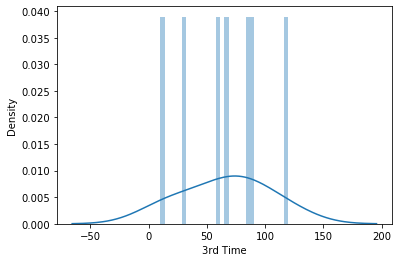

In [478]:
#nan埋め後のプロット
sns.distplot(df['3rd Time'], bins=30)

35.67391304347826
30.0
count    109.000000
mean      35.673913
std       18.318736
min        0.000000
25%       30.000000
50%       30.000000
75%       40.000000
max      120.000000
Name: Press Time, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


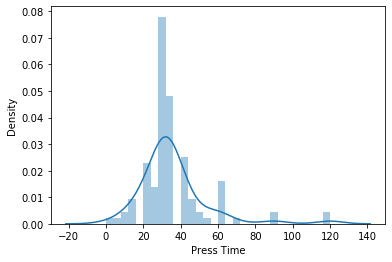

In [479]:
#Press time

#コピーから代表値を作る
#一括floatによりNoneもNaNになってしまうため，コピーして代表値
d = df['Press Time'].replace('?', np.nan).astype(float)
mean_press_time = np.nanmean(d)
median_press_time = np.nanmedian(d)
print(mean_press_time)
print(median_press_time)
print(d.describe())

#欠損値処理
for x in df['Press Time']:
    #?なら平均値埋め
    if x == '?':
        df.loc[df['Press Time'] == x, ['Press Time']] = mean_press_time
    #str→float
    elif type(x) == str:
        df.loc[df['Press Time'] == x, ['Press Time']] = float(x)
    #Noneはそのまま
    else:
        df.loc[df['Press Time'] == x, ['Press Time']] = x
#nan埋めする前のプロット
sns.distplot(d, bins=30)

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


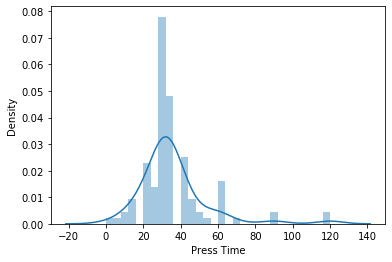

In [438]:
#nan埋め後のプロット
sns.distplot(df['Press Time'], bins=30)

In [516]:
#Total Timeの作成
df['Total Time'] = 0
#行番号の取得
for x in range(len(df['TT'])):
    if df['TT'][x] is None:
        #各Timeから行番号の値をリストに格納
        elements = [df['1st Time'][x], df['2nd Time'][x], df['3rd Time'][x], df['Press Time'][x]]
        #None以外を残す
        element = np.array([y for y in elements if y is not None])
        df['Total Time'][x] = np.nansum(element)
    else:
        df['Total Time'][x] = df['TT'][x]
df['Total Time']  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0      120
1       60
2      135
3       70
4       75
5       90
6      130
7      165
8      114
9       90
10     100
11     180
12      95
13     105
14     240
15     150
16      71
17      97
18     145
19     150
20      95
21     135
22     160
23     155
24     120
25     105
26      60
27     110
28     135
29     140
30     220
31     120
32     165
33     240
34     160
35     130
36      90
37     137
38     115
39     140
40      95
41     135
42     160
43     130
44     180
45     144
46     180
47     144
48     125
49      90
50      90
51     120
52     100
53     190
54     110
55     102
56      90
57     220
58     139
59      85
60     160
61     100
62     132
63     105
64      80
65      60
66     120
67     210
68      65
69      80
70      90
71      95
72     130
73      62
74     195
75     160
76     150
77     110
78      45
79     110
80     155
81      70
82      25
83      91
84     120
85     215
86      90
87     135
88     180
89     120
90     110

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


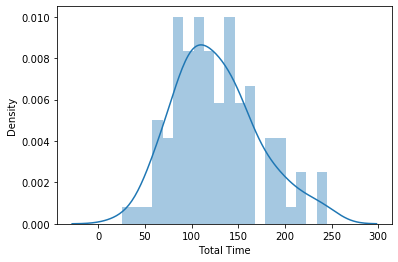

In [521]:
time = df['Total Time']  
sns.distplot(time, bins=20)

In [533]:
data = pd.DataFrame(df.loc[:,['Coffee Weight', 'Water Weight', 'Total Time', 'grind', 'Temp', 'Position','Paper']])

In [532]:
df.columns

Index(['Competitor', 'Year', 'Origin', 'Region', 'Coffee', 'Position',
       'Filter', 'Preperation', 'Coffee Weight', 'Grinder', 'Grind',
       'Water Weight', 'Type', 'Temp', '1st Add', '1st Time', '1st Swirl/Stir',
       '2nd Add', '2nd Time', '2nd Swirl/Stir', '3rd Add', '3rd Time',
       '3rd Swirl/Stir', 'Press Time', 'Dilution', 'TT', 'Total Time', 'grind',
       'Bolivia', 'Brazil', 'Burundi', 'Colombia', 'Costa Rica',
       'Eastern Congo', 'Ecuador', 'El Salvador', 'Ethiopia', 'Guatemala',
       'Honduras', 'India', 'Indonesia', 'Kenya', 'Mexico', 'Nicaragua',
       'Panama', 'Rwanda', 'Thailand', 'Venezuela', 'Metal', 'Paper'],
      dtype='object')

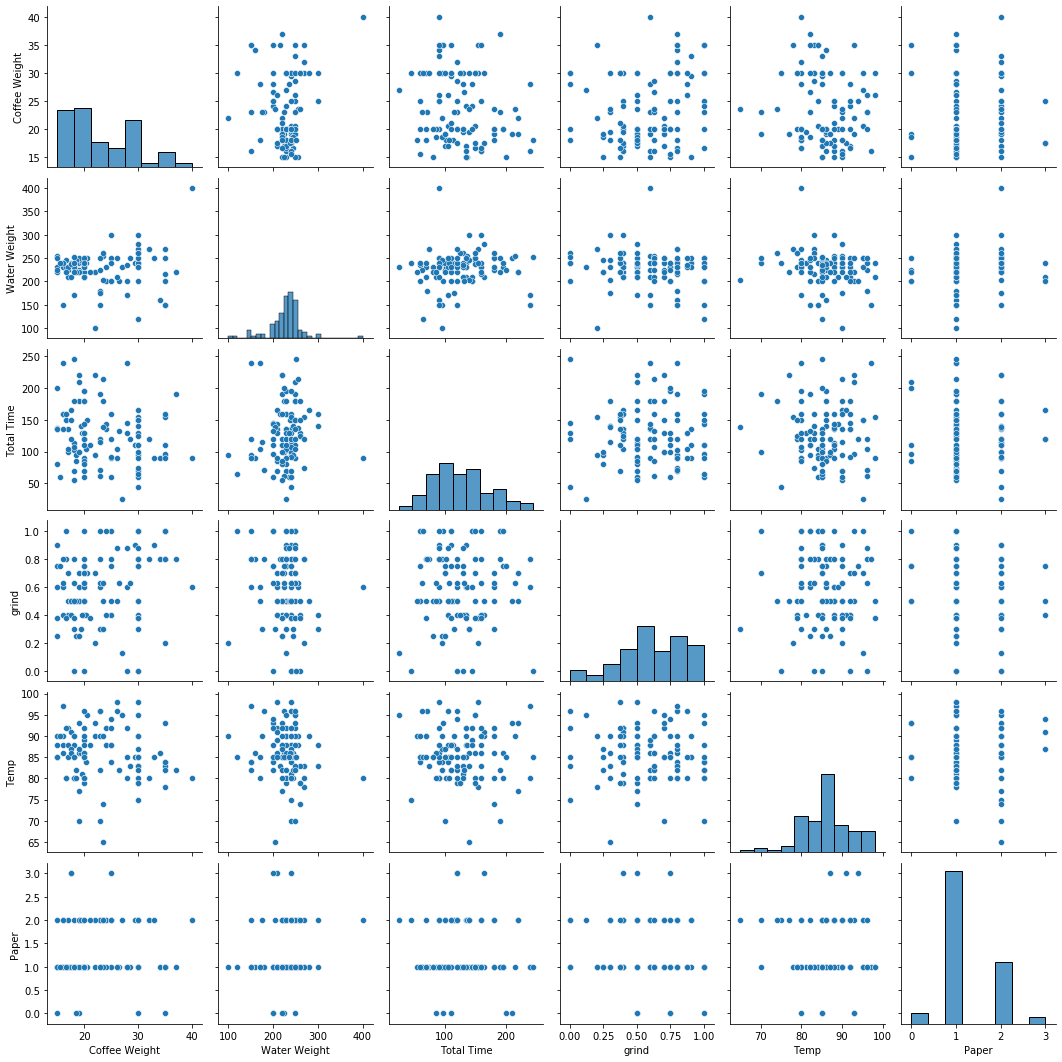

In [534]:
#ペアプロット
sns.pairplot(data)

In [535]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [553]:
dfnew = data.rename(columns={'Coffee Weight': 'CW', 'Water Weight': 'WW', 'Total Time': 'TT'})
dfnew

,CW,WW,TT,grind,Temp,Position,Paper
0,20,220,120,0.400,85,Inverted,1
1,30,240,60,0.500,85,Inverted,1
2,17,210,135,0.400,92,Uplight,1
3,30,230,70,0.800,90,Inverted,2
4,30,270,75,0.800,83,Uplight,1
5,34,160,90,0.800,86,Inverted,1
6,30,260,130,0.000,83,Uplight,1
7,30,280,165,0.500,90,Inverted,1
8,18,240,114,0.500,88,Uplight,2
9,20,230,90,0.800,80,Uplight,1


In [552]:
#Timeに対して正に有意かどうか
# x = df.loc[:, ['Coffee Weight', 'Water Weight', 'grind', 'Paper']]
# # x1 = df['Coffee Weight']
# # x2 = df['Water Weight']
# # x3 = df['grind']
# # x4 = df['Paper']
# y = df['Total Time']
# results = smf.ols(formula="Total Time ~ Coffee Weight + Water Weight + grind + Paper", data=df).fit()
results = smf.ols(formula="TT ~ CW + WW + grind + Paper", data=dfnew).fit()
print(results.summary())
# Time = Paper + Metal + Water

                            OLS Regression Results                            
Dep. Variable:                     TT   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     1.768
Date:                Fri, 23 Apr 2021   Prob (F-statistic):             0.0201
Time:                        01:08:52   Log-Likelihood:                -510.16
No. Observations:                 109   AIC:                             1136.
Df Residuals:                      51   BIC:                             1292.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -17.4518     58.642     -0.298      

In [ ]:
#可視化可能な範囲でのクラスタリング
#Ratio Time Temp


In [219]:
df.columns

Index(['Competitor', 'Year', 'Origin', 'Region', 'Coffee', 'Position',
       'Filter', 'Preperation', 'Coffee Weight', 'Grinder', 'Grind',
       'Water Weight', 'Type', 'Temp', '1st Add', '1st Time', '1st Swirl/Stir',
       '2nd Add', '2nd Time', '2nd Swirl/Stir', '3rd Add', '3rd Time',
       '3rd Swirl/Stir', 'Press time', 'Dilution', 'TT', 'grind', 'Bolivia',
       'Brazil', 'Burundi', 'Colombia', 'Costa Rica', 'Eastern Congo',
       'Ecuador', 'El Salvador', 'Ethiopia', 'Guatemala', 'Honduras', 'India',
       'Indonesia', 'Kenya', 'Mexico', 'Nicaragua', 'Panama', 'Rwanda',
       'Thailand', 'Venezuela', 'Metal', 'Paper'],
      dtype='object')